In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 1. District wise peaks

### finding peaks for weeks 

In [6]:
#in q3 we created district wise covid cases table similary we create active cases table 
#formula for active cases = confirmed - recovered - deceased 
#Now importing that file
week_covid_data = pd.read_csv("data/active-case-week.csv")

In [7]:
week_covid_data

,districtid,timeid,active-cases,stateid
0,TG_Adilabad,1,0,TG
1,MP_Agar Malwa,1,0,MP
2,UP_Agra,1,0,UP
3,GJ_Ahmedabad,1,0,GJ
4,MH_Ahmednagar,1,0,MH
...,...,...,...,...
98695,TG_Yadadri Bhuvanagiri,141,0,TG
98696,KA_Yadgir,141,0,KA
98697,HR_Yamunanagar,141,3,HR
98698,MH_Yavatmal,141,3,MH


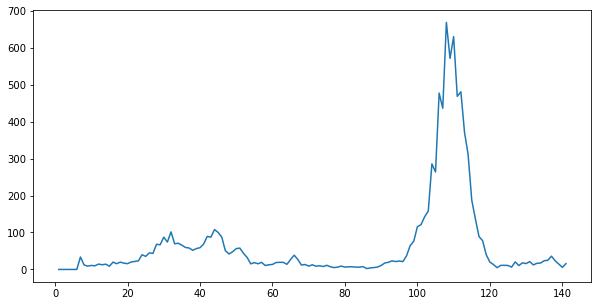

In [8]:
#plot the average covid cases per week to find peaks

#average cases per week
avg = []
for i in range(1,142):
    avg.append(np.mean(week_covid_data.query("timeid == @i")["active-cases"]))
    
x  = list(range(1,142))
plt.figure(figsize=(10,5))
plt.plot(x,avg);

In [9]:
#from above graph it is clear that wave_1 is before week 70 and wave_2 is after week 70
week_covid_wave1 = week_covid_data.query("timeid <= 70")
week_covid_wave2 = week_covid_data.query("timeid > 70")

In [10]:
#list of districts
district = list(week_covid_data.iloc[0:700]["districtid"])

In [11]:
#storing peak week id of both wave corresponding to district index 
peak_week_wave1 = []
peak_week_wave2 = []
for i in range(len(district)):
    x = district[i]
    peak_week_wave1.append(np.argmax(week_covid_wave1.query("districtid == @x")["active-cases"]) + 1)
    peak_week_wave2.append(np.argmax(week_covid_wave2.query("districtid == @x")["active-cases"]) + 1 + 70)

### finding peaks for month

In [12]:
month_covid_data = pd.read_csv("data/active-case-month.csv")

In [13]:
month_covid_data

,districtid,timeid,active-cases,stateid
0,TG_Adilabad,1,0,TG
1,MP_Agar Malwa,1,0,MP
2,UP_Agra,1,0,UP
3,GJ_Ahmedabad,1,0,GJ
4,MH_Ahmednagar,1,0,MH
...,...,...,...,...
11895,TG_Yadadri Bhuvanagiri,17,0,TG
11896,KA_Yadgir,17,0,KA
11897,HR_Yamunanagar,17,0,HR
11898,MH_Yavatmal,17,0,MH


In [14]:
#from above graph it is clear that wave_1 is before week 70 that is dec 2020(monthid 9) and 
#wave_2 is after week 70 that is dec 2020
month_covid_wave1 = month_covid_data.query("timeid <= 9")
month_covid_wave2 = month_covid_data.query("timeid > 9")

In [15]:
#storing peak month id of both wave corresponding to district index 
peak_month_wave1 = []
peak_month_wave2 = []
for i in range(len(district)):
    x = district[i]
    peak_month_wave1.append(np.argmax(month_covid_wave1.query("districtid == @x")["active-cases"]) + 1)
    peak_month_wave2.append(np.argmax(month_covid_wave2.query("districtid == @x")["active-cases"]) + 1 + 9)

In [16]:
#resul dataframe
result = pd.DataFrame(columns = ["districtid","wave1-weekid","wave2-weekid","wave1-monthid","wave2-monthid"])

In [17]:
for i in range(len(district)):
    dic = {
        "districtid" : district[i],
        "wave1-weekid" : peak_week_wave1[i],
        "wave2-weekid" : peak_week_wave2[i],
        "wave1-monthid" : peak_month_wave1[i],
        "wave2-monthid" : peak_month_wave2[i]
    }
    result = result.append(dic,ignore_index = True)

In [19]:
result = result.sort_values(["districtid"])

In [20]:
result

,districtid,wave1-weekid,wave2-weekid,wave1-monthid,wave2-monthid
22,AP_Anantapur,32,112,5,14
126,AP_Chittoor,32,111,5,14
177,AP_East Godavari,34,112,5,14
222,AP_Guntur,30,112,5,14
351,AP_Krishna,30,109,5,14
...,...,...,...,...,...
501,WB_Purba Bardhaman,44,113,5,14
502,WB_Purba Medinipur,36,110,5,14
505,WB_Purulia,40,109,6,14
598,WB_South 24 Parganas,36,110,5,14


In [94]:
result.to_csv("district-peaks.csv",index = False)

# 2. State wise peak

### finding peaks for weeks 

In [21]:
week_covid_data

,districtid,timeid,active-cases,stateid
0,TG_Adilabad,1,0,TG
1,MP_Agar Malwa,1,0,MP
2,UP_Agra,1,0,UP
3,GJ_Ahmedabad,1,0,GJ
4,MH_Ahmednagar,1,0,MH
...,...,...,...,...
98695,TG_Yadadri Bhuvanagiri,141,0,TG
98696,KA_Yadgir,141,0,KA
98697,HR_Yamunanagar,141,3,HR
98698,MH_Yavatmal,141,3,MH


In [22]:
#list of states
state = np.unique(week_covid_data.iloc[0:700]["stateid"])

In [23]:
#creating a dataframe for state wise covid data week wise
week_state_data = pd.DataFrame(columns = ["stateid","timeid","active-cases"])
for j in range(1,142):
    for i in state:
        dic = {
            "stateid" : i,
            "timeid" : j,
            "active-cases" : np.sum(week_covid_data.query("timeid == @j & stateid ==@i")["active-cases"])
        }
        week_state_data = week_state_data.append(dic,ignore_index=True)

In [24]:
week_state_data

,stateid,timeid,active-cases
0,AP,1,0
1,AR,1,0
2,AS,1,0
3,BR,1,0
4,CH,1,0
...,...,...,...
4789,TN,141,606
4790,TR,141,0
4791,UP,141,41
4792,UT,141,19


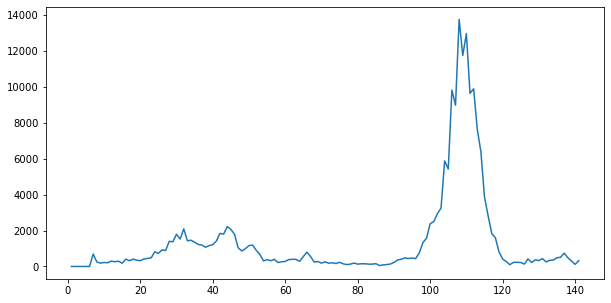

In [25]:
#plot the average covid cases per week to find peak

#average cases per week
avg = []
for i in range(1,142):
    avg.append(np.mean(week_state_data.query("timeid == @i")["active-cases"]))
    
x  = list(range(1,142))
plt.figure(figsize=(10,5))
plt.plot(x,avg);

In [26]:
#from above graph it is clear that wave_1 is before week 70 and wave_2 is after week 70
week_covid_wave1 = week_state_data.query("timeid <= 70")
week_covid_wave2 = week_state_data.query("timeid > 70")

In [27]:
#storing peak week id of both wave corresponding to district index 
peak_week_wave1 = []
peak_week_wave2 = []
for i in range(len(state)):
    x = state[i]
    peak_week_wave1.append(np.argmax(week_covid_wave1.query("stateid == @x")["active-cases"]) + 1)
    peak_week_wave2.append(np.argmax(week_covid_wave2.query("stateid == @x")["active-cases"]) + 1 + 70)

### finding peaks for month

In [29]:
month_covid_data

,districtid,timeid,active-cases,stateid
0,TG_Adilabad,1,0,TG
1,MP_Agar Malwa,1,0,MP
2,UP_Agra,1,0,UP
3,GJ_Ahmedabad,1,0,GJ
4,MH_Ahmednagar,1,0,MH
...,...,...,...,...
11895,TG_Yadadri Bhuvanagiri,17,0,TG
11896,KA_Yadgir,17,0,KA
11897,HR_Yamunanagar,17,0,HR
11898,MH_Yavatmal,17,0,MH


In [30]:
#creating state wise covid data month wise
month_state_data = pd.DataFrame(columns = ["stateid","timeid","active-cases"])
for j in range(1,18):
    for i in state:
        dic = {
            "stateid" : i,
            "timeid" : j,
            "active-cases" : np.sum(month_covid_data.query("timeid == @j & stateid ==@i")["active-cases"])
        }
        month_state_data = month_state_data.append(dic,ignore_index=True)

In [31]:
month_state_data

,stateid,timeid,active-cases
0,AP,1,0
1,AR,1,0
2,AS,1,0
3,BR,1,0
4,CH,1,0
...,...,...,...
573,TN,17,738
574,TR,17,0
575,UP,17,20
576,UT,17,41


In [32]:
#from above graph it is clear that wave_1 is before week 70 that is dec 2020(monthid 9) and 
#wave_2 is after week 70 that is dec 2020
month_covid_wave1 = month_state_data.query("timeid <= 9")
month_covid_wave2 = month_state_data.query("timeid > 9")

In [33]:
#storing peak month id of both wave corresponding to district index 
peak_month_wave1 = []
peak_month_wave2 = []
for i in range(len(state)):
    x = state[i]
    peak_month_wave1.append(np.argmax(month_covid_wave1.query("stateid == @x")["active-cases"]) + 1)
    peak_month_wave2.append(np.argmax(month_covid_wave2.query("stateid == @x")["active-cases"]) + 1 + 9)

In [34]:
#resul dataframe
result = pd.DataFrame(columns = ["stateid","wave1-weekid","wave2-weekid","wave1-monthid","wave2-monthid"])

In [35]:
for i in range(len(state)):
    dic = {
        "stateid" : state[i],
        "wave1-weekid" : peak_week_wave1[i],
        "wave2-weekid" : peak_week_wave2[i],
        "wave1-monthid" : peak_month_wave1[i],
        "wave2-monthid" : peak_month_wave2[i]
    }
    result = result.append(dic,ignore_index = True)

In [36]:
result

,stateid,wave1-weekid,wave2-weekid,wave1-monthid,wave2-monthid
0,AP,32,112,5,14
1,AR,50,118,7,14
2,AS,1,71,1,10
3,BR,35,108,5,14
4,CH,46,110,6,14
5,CT,44,106,6,13
6,DL,1,71,1,10
7,DN,25,108,5,13
8,GA,1,71,1,10
9,GJ,7,108,4,14


In [ ]:
result.to_csv("state-peaks.csv",index = False)

# Overall peak 

### finding peaks for weeks 

In [37]:
#creating all india cases per week table 
week_overall_data = pd.DataFrame(columns = ["timeid","active-cases"])
for j in range(1,142):
    dic = {
        "timeid" : j,
        "active-cases" : np.sum(week_state_data.query("timeid==@j")["active-cases"])
    }
    week_overall_data = week_overall_data.append(dic,ignore_index = True)

In [38]:
week_overall_data

,timeid,active-cases
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
136,137,25161
137,138,16575
138,139,10227
139,140,3973


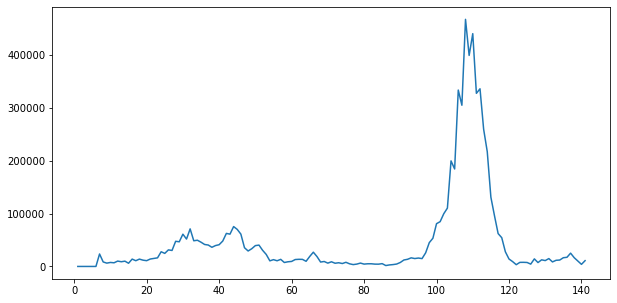

In [39]:
#plot the average covid cases per week to find peak

#average cases per week
avg = []
for i in range(1,142):
    avg.append(np.mean(week_overall_data.query("timeid == @i")["active-cases"]))
    
x  = list(range(1,142))
plt.figure(figsize=(10,5))
plt.plot(x,avg);

In [40]:
#from above graph it is clear that wave_1 is before week 70 and wave_2 is after week 70
week_covid_wave1 = week_overall_data.query("timeid <= 70")
week_covid_wave2 = week_overall_data.query("timeid > 70")

In [42]:
#storing peak week id of both wave corresponding to district index 
peak_week_wave1 = np.argmax(week_covid_wave1["active-cases"]) + 1
peak_week_wave2 = np.argmax(week_covid_wave2["active-cases"]) + 1 + 70

### finding peaks for month

In [43]:
#creating all india cases per month table
month_overall_data = pd.DataFrame(columns = ["timeid","active-cases"])
for j in range(1,18):
    dic = {
        "timeid" : j,
        "active-cases" : np.sum(month_state_data.query("timeid==@j")["active-cases"])
    }
    month_overall_data = month_overall_data.append(dic,ignore_index = True)

In [44]:
month_overall_data

,timeid,active-cases
0,1,0
1,2,44316
2,3,71652
3,4,165841
4,5,349325
5,6,351265
6,7,126378
7,8,24774
8,9,26559
9,10,9400


In [45]:
#from above graph it is clear that wave_1 is before week 70 that is dec 2020(monthid 9) and 
#wave_2 is after week 70 that is dec 2020
month_covid_wave1 = month_overall_data.query("timeid <= 9")
month_covid_wave2 = month_overall_data.query("timeid > 9")

In [46]:
#storing peak month id of both wave corresponding to district index 
peak_month_wave1 = np.argmax(month_covid_wave1["active-cases"]) + 1
peak_month_wave2 = np.argmax(month_covid_wave2["active-cases"]) + 1 + 9

In [47]:
#resul dataframe
result = pd.DataFrame(columns = ["overall","wave1-weekid","wave2-weekid","wave1-monthid","wave2-monthid"])

In [48]:
dic = {
        "overall" : "overall",
        "wave1-weekid" : peak_week_wave1,
        "wave2-weekid" : peak_week_wave2,
        "wave1-monthid" : peak_month_wave1,
        "wave2-monthid" : peak_month_wave2
    }
result = result.append(dic,ignore_index = True)

In [49]:
result

,overall,wave1-weekid,wave2-weekid,wave1-monthid,wave2-monthid
0,overall,44,108,6,14


In [ ]:
result.to_csv("overall-peaks.csv",index = False)